# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
#Import numpy, matplotlib, and pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#1) Numeric variable: clean the price variable
#load the data into a dataframe
url = "https://raw.githubusercontent.com/ds3001f25/wrangling_assignment/refs/heads/main/data/airbnb_hw.csv"
df = pd.read_csv(url)
#view the data
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
#look at the Price column and its datatype
print(df['Price'].unique())
print(df['Price'].dtype)


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

In [4]:
#1) Numeric variable: clean the price variable
#remove commas so that the values can be converted to numeric values
df['Price'] = df['Price'].replace(',', '')

In [5]:
#Convert Price variable to numeric and check results
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [6]:
#Count missing values
missing_values = df['Price'].isna().sum()
print(f"Number of missing values in 'Price': {missing_values}")

Number of missing values in 'Price': 181


I cleaned the 'Price' column by removing commas, so that I was able to convert the values to numeric. After I did this, I was then able to convert the prices to numeric values. After this conversion, there were 181 missing values.

2) Categorical variables

In [7]:
#2) Categorical variables: clean the subject_injury variable
#load the data
url = "https://raw.githubusercontent.com/ds3001f25/wrangling_assignment/refs/heads/main/data/mn_police_use_of_force.csv"
df = pd.read_csv(url)
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [8]:

# Replace blank strings or single-space strings with NaN
df['subject_injury'] = df['subject_injury'].replace(['', ' '], np.nan)

# Print unique values to ensure that the only values are nan, 'No', and 'Yes'
print(df['subject_injury'].unique(), '\n')

# Print value counts (excluding NaN by default)
print(df['subject_injury'].value_counts(), '\n')

# Calculate and print the proportion of missing values
missing_proportion = df['subject_injury'].isna().mean()
print(f"Proportion of missing values in 'subject_injury': {missing_proportion:.2%}")


[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

Proportion of missing values in 'subject_injury': 76.19%


The proportion of missing values for subject_injury is 76.19%, which is very high and a cause for concern. This can mean that injuries are not being reported properly.

In [9]:
#Cross-tabulate your cleaned subject_injury variable with the force_type variable.

pd.crosstab(df['force_type'], df['subject_injury'], dropna = False)


subject_injury,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


Are there any patterns regarding when the data are missing?
Bodily force, chemical irritant, and tasers have the highest Nan counts. It also seems that there are a very low number of firearm injuries reported in general.

In [10]:
#Dummy variable
url = "https://raw.githubusercontent.com/ds3001f25/wrangling_assignment/refs/heads/main/data/justice_data.parquet"
df = pd.read_parquet(url)
df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [11]:
# clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.

#rename the variable
df = df.rename(columns={'WhetherDefendantWasReleasedPretrial': 'released'})
df['released'].unique()


array([9, 0, 1])

In [12]:
#replace missing values with np.nan
var = 'released'
print(df['released'].unique(), '\n')
df[var] = df['released'].replace([9], np.nan) # Notice the list
print(df['released'].value_counts())

[9 0 1] 

released
1.0    19154
0.0     3801
Name: count, dtype: int64


In [18]:
#Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)
url = "https://raw.githubusercontent.com/ds3001f25/wrangling_assignment/refs/heads/main/data/justice_data.parquet"
df = pd.read_parquet(url)
df['ImposedSentenceAllChargeInContactEvent'].unique()

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

In [14]:
#Coerce invalid values to Nan
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

In [15]:

df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()

array([9, 0, 1, 4, 2])

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [16]:
#Open the shark attack file using Pandas
df = pd.read_excel('GSAF5.xls')
df.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [18]:
#Drop any columns that do not contain data
df = df.dropna(axis= 1, how = 'all')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Clean the year variable. Describe the range of values you see.
print(df['Year'].unique())
print(df['Year'].dtype)

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

In [20]:
df['Year'] = df['Year'].replace('.', '')

In [21]:
#change to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

Describe the range of values that you see:

In [26]:
#filter the rows to focus on attacks since 1940
df = df[df['Year'] >= 1940]
df['Year'].describe()

,Year
count,5507.000000
mean,1992.225350
std,24.169336
min,1940.000000
25%,1970.000000
50%,2000.000000
75%,2013.000000
max,2026.000000


Are attacks increasing, decreasing, or remaining constant over time?

In [23]:
#Clean the Age variable and make a histogram of the ages of the victims.
df['Age'].unique()



array(['?', '63', '9', '39', '19', '7', '85', '69', '18', '66', '21',
       '40', '37', '16', '20', '12', '42', '26', '14', '45', '30', '30+',
       '56', '40+', '29', 35, 58, 29, 24, 20, 55, 17, 12, 37, 36, 23, 40,
       28, 69, 48, '60+', 57, 45, 61, 27, 38, 16, 68, 33, 30, 15, 41, 14,
       43, 26, 'Middle age', 18, 21, 49, 25, 46, 19, 65, 64, '13', nan,
       '11', '46', '32', '10', '64', '62', '22', '15', '52', '44', '47',
       '55', '59', '8', '50', '34', '38', '30s', '20/30', '35', '65',
       '20s', '77', '60', '49', '!2', '24', '73', '25', '50s', '58', '67',
       '17', '6', '41', '53', '68', '43', '51', '31', 39, 51, 10, 13, 60,
       '40s', 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 50, 'M', 9, 31, 11,
       34, '!6', '!!', 47, 7, 71, 59, 53, 54, 75, '45 and 15', 73, 52, 70,
       4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's", 67, 74,
       '9 & 60', 'a minor', 6, 3, 82, '40?', 66, 72, '23', '36', '71',
       '48', '70', '18 months', '57', '28', '33', '61', '74

In [24]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].unique()

array([nan, 63.,  9., 39., 19.,  7., 85., 69., 18., 66., 21., 40., 37.,
       16., 20., 12., 42., 26., 14., 45., 30., 56., 29., 35., 58., 24.,
       55., 17., 36., 23., 28., 48., 57., 61., 27., 38., 68., 33., 15.,
       41., 43., 49., 25., 46., 65., 64., 13., 11., 32., 10., 62., 22.,
       52., 44., 47., 59.,  8., 50., 34., 77., 60., 73., 67.,  6., 53.,
       51., 31., 71., 54., 75., 70.,  4., 74.,  3., 82., 72.,  5., 86.,
       84., 87.,  1., 81., 78.])

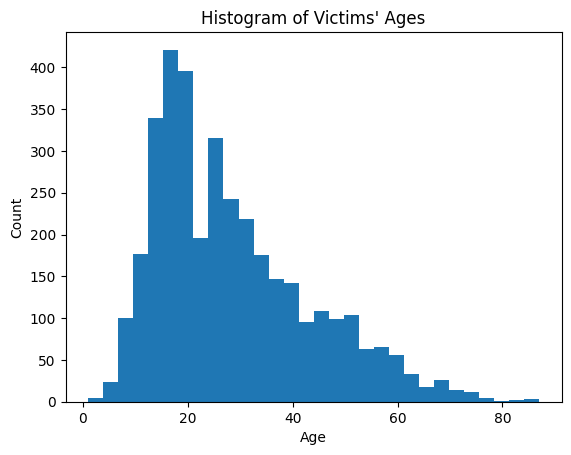

In [25]:
plt.hist(df['Age'].dropna(), bins=30)
plt.title('Histogram of Victims\' Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [27]:
#What proportion of victims are male?
print(df['Sex'].value_counts(dropna=False))

Sex
M        4328
F         718
NaN       452
M           3
F           2
 M          1
m           1
lli         1
M x 2       1
Name: count, dtype: int64


In [28]:
# Clean the Sex variable - Remove spaces and convert to uppercase
# Strip spaces and convert to uppercase
df['Sex_clean'] = df['Sex'].astype(str).str.strip().str.upper()

# Replace invalid or unusual values with NaN
df['Sex_clean'] = df['Sex_clean'].replace({
    'M': 'M',
    'F': 'F',
    'M X 2': 'M',
    'F X 2': 'F'
})

# Set anything that's not 'M' or 'F' to NaN
df['Sex_clean'] = df['Sex_clean'].where(df['Sex_clean'].isin(['M', 'F']), np.nan)


In [29]:
df['Sex_clean'].unique()

array(['M', 'F', nan], dtype=object)

In [30]:
#What proportion of victims are male?
print(df['Sex_clean'].value_counts(dropna=False, normalize=True).loc['M'])

0.786998365716361


In [31]:
#Clean the type variable to 3 values: 'Provoked', 'Unprovoked', 'Unknown'
print(df['Type'].unique())


['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']


In [34]:
#Clean the type variable to three values:
df['Type_clean'] = df['Type'].str.strip().str.capitalize()
unknown_values = ['Questionable', 'Invalid', 'Unconfirmed', 'Under investigation', 'Unverified', 'Sea disaster', 'Boat', 'Watercraft', 'NaN', '?']
df['Type_clean'] = df['Type_clean'].replace(unknown_values, 'Unknown')
df['Type'] = df['Type'].fillna('Unknown')



In [35]:
#check that there are only three values now
df['Type_clean'].unique()

array(['Provoked', 'Unprovoked', 'Unknown'], dtype=object)

In [36]:
#What proportion of attacks are unprovoked?
print(df['Type_clean'].value_counts(normalize=True).loc['Unprovoked'])

0.7441438169602325


The proportion of unprovoked attacks is about 0.744

In [37]:
#Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
df['Fatal Y/N'].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N'],
      dtype=object)

In [38]:
#Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown
df['Fatal_clean'] = df['Fatal Y/N'].str.strip().str.capitalize()
df['Fatal_clean'] = df['Fatal_clean'].replace({
    'M': 'Unknown',
    'nan': 'Unknown',
    'Y x 2': 'Unknown',
    'F': 'Unknown',
    'Nq': 'Unknown'
})
df['Type'] = df['Type'].fillna('Unknown')

In [40]:
#check to ensure that there are only three values
df['Fatal_clean'].unique()

array(['N', 'Y', 'Unknown', nan], dtype=object)

In [41]:
#Are sharks more likely to launch unprovoked attacks on men or women?
pd.crosstab(df['Sex_clean'], df['Type_clean'], normalize='index')


Type_clean,Provoked,Unknown,Unprovoked
Sex_clean,,,
F,0.038889,0.109722,0.851389
M,0.103369,0.125288,0.771343


Sharks are more likely to launch unprovoked attacks on women.

In [42]:
#Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
pd.crosstab(df['Type_clean'], df['Fatal_clean'], margins=True, dropna=False)


Fatal_clean,N,Unknown,Y,NaN,All
Type_clean,,,,,
Provoked,498,4,13,5,520
Unknown,366,10,123,390,889
Unprovoked,3357,41,688,12,4098
All,4221,55,824,0,5507


The attack is more likely to be fatal when the attack is unprovoked.

In [43]:
#Is it more or less likely to be fatal when the victim is male or female?
pd.crosstab(df['Sex_clean'], df['Fatal_clean'], margins=True, dropna=False)


Fatal_clean,N,Unknown,Y,NaN,All
Sex_clean,,,,,
F,572,3,89,56,720.0
M,3351,31,659,293,4334.0
NaN,298,21,76,58,NaN
All,4221,55,824,0,5507.0


The attack is more likely to be fatal when the victim is male.

How do you feel about sharks?

In [45]:
#What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

#rename Species column not to have a space
df.rename(columns={'Species ': 'Species'}, inplace=True)


In [46]:

# Change to lowercase and split on spaces
df['Split_Species'] = df['Species'].str.split()

In [47]:
df['Split_Species'].unique()

TypeError: unhashable type: 'list'

In [49]:
df['is_white_shark'] = df['Split_Species'].str.contains('White Shark', case=False, na=False)


In [50]:
proportion_white_shark = df['is_white_shark'].mean()
print(f"Proportion of attacks by white sharks: {proportion_white_shark:.2%}")


Proportion of attacks by white sharks: 0.00%
